# 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

import sys
import os

# Adiciona o diretório raiz ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from utils.plots import plot_most_subjects_per_class, plot_apriori_rules

import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
load_dotenv()

True

# 1. Data Loading

In [2]:
df_orgaosJulgadores = pd.read_csv(os.path.join(os.environ['PATH_DATA_PROCESSED'], 'df_orgaosJulgadores.csv'))

# 2. Frequência dos Orgãos Julgadores por setorDestino

In [3]:
df_orgaos_agregados = df_orgaosJulgadores.groupby('setorDestino').sum()

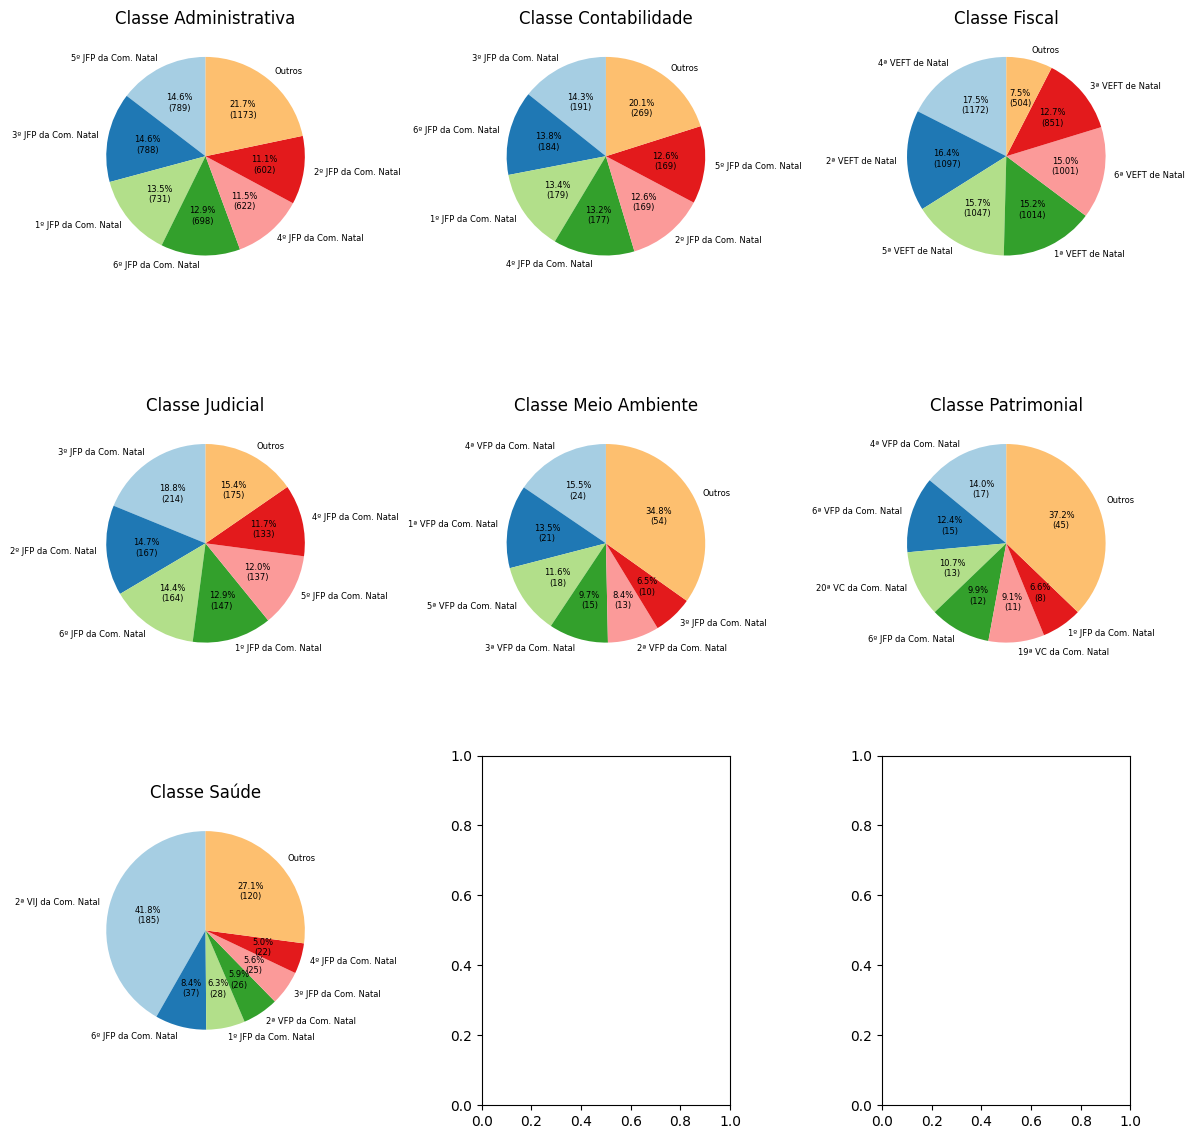

In [4]:
plot_most_subjects_per_class(df=df_orgaos_agregados, N=6, fontsize=6)

# 3. Análisando por cada Orgão Julgador

Verifica em cada orgão julgador se há uma predominância por uma classe

In [7]:
for orgao in sorted(df_orgaos_agregados.columns, key=lambda x: sum(df_orgaos_agregados[x]), reverse=True):
    # Põe a quantidade de textos em porcentagem por Órgão Julgador
    serie = df_orgaos_agregados[orgao] / sum(df_orgaos_agregados[orgao])
    
    # Verifica se no órgão julgador temos mais de 95% de uma única classe
    if serie.max() > 0.10:
        print(f"{orgao.ljust(50)}|{str(serie.idxmax()).ljust(30)}|{serie.max()*100:>6.2f}% de {sum(df_orgaos_agregados[orgao])} textos")

3º JFP da Com. Natal                              |Administrativa                | 62.15% de 1268 textos
4ª VEFT de Natal                                  |Fiscal                        | 98.65% de 1188 textos
5º JFP da Com. Natal                              |Administrativa                | 68.08% de 1159 textos
1º JFP da Com. Natal                              |Administrativa                | 65.50% de 1116 textos
2ª VEFT de Natal                                  |Fiscal                        | 98.47% de 1114 textos
6º JFP da Com. Natal                              |Administrativa                | 62.66% de 1114 textos
5ª VEFT de Natal                                  |Fiscal                        | 97.76% de 1071 textos
1ª VEFT de Natal                                  |Fiscal                        | 98.35% de 1031 textos
6ª VEFT de Natal                                  |Fiscal                        | 98.04% de 1021 textos
4º JFP da Com. Natal                              |Admi

# 4. Regras

Analisando os gŕaficos acima, podemos chegar a algumas regras de classificação (baseado nos orgãos julgadores) para algumas classes.

<span style="color:red">IMPORTANTE:</span> As regras aqui definidas ainda passarão por aprovação de Kézia e também dependerá de indicadores de score para participar da classificação.

<h2>Fiscal</h2>

Podem ser classficadas como da Fiscal se o Orgão Julgador é algum desses

* VEFT (Vara de Execução Fiscal e Tributária)
* Central de Avaliação e Arrematação